In [3]:
import numpy as np                     #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preprocessing**

In [5]:
data=pd.read_csv('/content/drive/MyDrive/ML_Assignment/diamonds.csv')        #reading the dataset

In [6]:
data.head(15)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
5,6,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336
6,7,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336
7,8,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,337
8,9,0.22,Fair,E,VS2,65.1,61.0,3.87,3.78,2.49,337
9,10,0.23,Very Good,H,VS1,59.4,61.0,4.00,4.05,2.39,338


In [7]:
data.isna().sum()    # no null values present

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [8]:
print(data['cut'].unique())                     #checking the unique values of categorical data
print(data['color'].unique())
print(data['clarity'].unique())         

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


# **Label Encoding**

In [9]:
from sklearn.preprocessing import LabelEncoder       # encoding the categorical data
le=LabelEncoder()
l1=le.fit_transform(data['cut'])
l2=le.fit_transform(data['color'])
l3=le.fit_transform(data['clarity'])


In [10]:
data=data.drop(['cut','color','clarity'],axis=1)     # dropping the columns which are encoded

In [11]:
data['cut']=l1                     # adding the encoded labeled column
data['color']=l2
data['clarity']=l3

In [12]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut,color,clarity
0,1,0.23,61.5,55.0,3.95,3.98,2.43,326,2,1,3
1,2,0.21,59.8,61.0,3.89,3.84,2.31,326,3,1,2
2,3,0.23,56.9,65.0,4.05,4.07,2.31,327,1,1,4
3,4,0.29,62.4,58.0,4.20,4.23,2.63,334,3,5,5
4,5,0.31,63.3,58.0,4.34,4.35,2.75,335,1,6,3


# **Feature Scaling**
Min Max Normalization

In [13]:
data['carat']=data['carat'].apply(lambda v:(v-data['carat'].min())/(data['carat'].max()-data['carat'].min(0)))       # scaling the numerical data
data['depth']=data['depth'].apply(lambda v:(v-data['depth'].min())/(data['depth'].max()-data['depth'].min(0)))
data['table']=data['table'].apply(lambda v:(v-data['table'].min())/(data['table'].max()-data['table'].min(0)))
data['price']=data['price'].apply(lambda v:(v-data['price'].min())/(data['price'].max()-data['price'].min(0)))
data['x']=data['x'].apply(lambda v:(v-data['x'].min())/(data['x'].max()-data['x'].min(0)))
data['y']=data['y'].apply(lambda v:(v-data['y'].min())/(data['y'].max()-data['y'].min(0)))
data['z']=data['z'].apply(lambda v:(v-data['z'].min())/(data['z'].max()-data['z'].min(0)))


In [14]:
data.head(10)

,Unnamed: 0,carat,depth,table,x,y,z,price,cut,color,clarity
0,1,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.000000,2,1,3
1,2,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.000000,3,1,2
2,3,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.000054,1,1,4
3,4,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.000433,3,5,5
4,5,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.000487,1,6,3
5,6,0.008316,0.550000,0.269231,0.366853,0.067233,0.077987,0.000541,4,6,7
6,7,0.008316,0.536111,0.269231,0.367784,0.067572,0.077673,0.000541,4,5,6
7,8,0.012474,0.525000,0.230769,0.378957,0.069779,0.079560,0.000595,4,4,2
8,9,0.004158,0.613889,0.346154,0.360335,0.064177,0.078302,0.000595,0,1,5
9,10,0.006237,0.455556,0.346154,0.372439,0.068761,0.075157,0.000649,4,4,4


In [15]:
data=data.drop(['Unnamed: 0'],axis=1)     # dropping Unnamed column
data.head(2)


,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,2,1,3
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,3,1,2


In [16]:
df=data      
df.to_csv("Diamonds.csv")     #storing the preprocessed data in other variable for later use 
# print(data.head(2))
# print(df.head(2))

# **Checking for outliers**

([<matplotlib.axis.XTick at 0x7f7e70153650>,
 [Text(0, 0, 'carat'),
  Text(0, 0, 'depth'),
  Text(0, 0, 'table'),
  Text(0, 0, 'x'),
  Text(0, 0, 'y'),
  Text(0, 0, 'z'),
  Text(0, 0, 'price'),
  Text(0, 0, 'cut'),
  Text(0, 0, 'color'),
  Text(0, 0, 'clarity')])

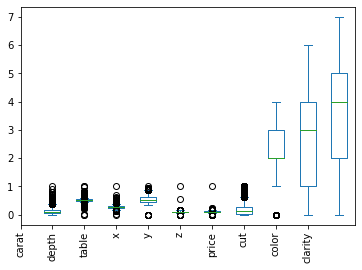

In [18]:
data.plot.box()                                                                      # on plotting box plot model we have seen that there are not many outliers so we ignore them
plt.xticks(list(range(len(data.columns))),data.columns,rotation='vertical')             


# **Training and Testing data split**

In [19]:
data.head(3)

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.000000,2,1,3
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.000000,3,1,2
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.000054,1,1,4


In [20]:
data.shape

(53940, 10)

In [21]:
data=data.sample(frac=1)                           #shuffling the dataset to avoid bias

In [22]:
X=np.array(data.drop(['price'],1))                 #storing the values of input features in a variable X
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(53940, 9)

In [23]:
Y=np.array(data['price'])                        # storing the output values in variable Y
Y.shape

(53940,)

In [24]:
n_train=math.floor(0.8*X.shape[0])          # spliting the dataset for training and testing 
n_test=math.ceil(0.2*X.shape[0])            # 80% training data and 20% testing data

train_x=X[:n_train]
train_y=Y[:n_train]
test_x=X[n_train:]
test_y=Y[n_train:]
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)


# **Univariate Linear Regression**

In [25]:
data.corr()       # finding the correlation between the features

,carat,depth,table,x,y,z,price,cut,color,clarity
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591,0.017124,0.291437,-0.214290
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647,-0.194249,0.047279,-0.053080
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134,0.150327,0.026465,-0.088223
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435,0.022342,0.270287,-0.225721
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421,0.027572,0.263584,-0.217616
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249,0.002037,0.268227,-0.224263
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000,0.039860,0.172511,-0.071535
cut,0.017124,-0.194249,0.150327,0.022342,0.027572,0.002037,0.039860,1.000000,0.000304,0.028235
color,0.291437,0.047279,0.026465,0.270287,0.263584,0.268227,0.172511,0.000304,1.000000,-0.027795
clarity,-0.214290,-0.053080,-0.088223,-0.225721,-0.217616,-0.224263,-0.071535,0.028235,-0.027795,1.000000


In [26]:
data.corr()['price'].sort_values(ascending=False)    # carat feature is highly corelated to the output price value so we will use carat feature for univariate regression

price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64

In [27]:
print("Xtrain:",train_x)       
print("Ytrain:",train_y)
print("Xtest:",test_x)
print("Ytest:",test_y)

Xtrain: [[0.16839917 0.575      0.28846154 ... 1.         3.         3.        ]
 [0.18711019 0.52777778 0.26923077 ... 2.         2.         1.        ]
 [0.1039501  0.63333333 0.25       ... 0.         4.         4.        ]
 ...
 [0.03742204 0.51666667 0.23076923 ... 2.         1.         7.        ]
 [0.04573805 0.55833333 0.25       ... 4.         2.         2.        ]
 [0.31600832 0.525      0.25       ... 3.         4.         5.        ]]
Ytrain: [0.19446397 0.58966319 0.11293723 ... 0.0459534  0.03243769 0.69178786]
Xtest: [[0.18711019 0.49166667 0.23076923 ... 3.         0.         2.        ]
 [0.02286902 0.54722222 0.26923077 ... 2.         2.         5.        ]
 [0.41995842 0.54722222 0.35       ... 1.         5.         3.        ]
 ...
 [0.02286902 0.55277778 0.28846154 ... 3.         3.         7.        ]
 [0.27027027 0.48888889 0.34615385 ... 3.         4.         5.        ]
 [0.20997921 0.475      0.28846154 ... 3.         2.         4.        ]]
Ytest: [0.3320538

# **Univariate Linear Regression:Closed Form**

In [61]:
X_u=pd.DataFrame(train_x[:,0]) #training dataset
Y_u=pd.DataFrame(train_y)
#Y_u.reshape(X_u.shape[0],1)
Xt_u=pd.DataFrame(test_x[:,0]) #testing dataset
Yt_u=pd.DataFrame(test_y)
Xtu_u=Xt_u.to_numpy()


# univariate linear regression closed form
W=np.dot(np.linalg.inv(np.dot(X_u.T,X_u)),np.dot(X_u.T,Y_u))

ypred=np.dot(Xt_u,W)

print(X_u.shape)
print(Y_u.shape)
print(Xt_u.shape)
print(Yt_u.shape)

(43152, 1)
(43152, 1)
(10788, 1)
(10788, 1)


In [70]:
t_Xu=X_u.to_numpy()
t_Yu=Y_u.to_numpy()


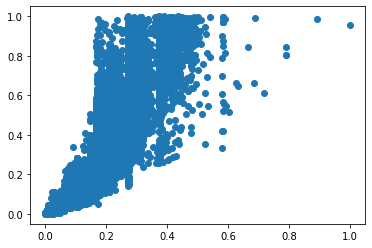

In [62]:
plt.scatter(X_u,Y_u)   # plotting the curve for visualisation of the dataset

In [63]:
ypred     # printing the predicted values

array([[0.3264119 ],
       [0.03989479],
       [0.73261337],
       ...,
       [0.03989479],
       [0.47148385],
       [0.36630669]])

In [64]:
loss=(np.dot(np.subtract(ypred,Yt_u).T,np.subtract(ypred,Yt_u)))/Yt_u.shape[0]               # computing the mean squared error
loss

array([[0.00803961]])

In [65]:
# X_u=pd.DataFrame(X_u)
# Xt_u=pd.DataFrame(Xt_u)

# Y_u=pd.DataFrame(Y_u)
# Yt_u=pd.DataFrame(Y_u)


Text(0, 0.5, 'Y-target')

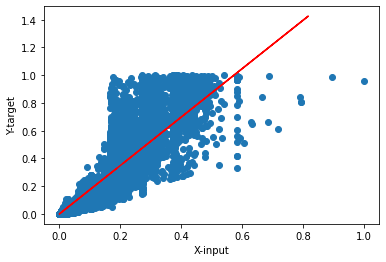

In [66]:
plt.scatter(X_u,Y_u)           # plotting the curve for the predicted value
plt.plot( Xtu_u ,ypred,color='red')
plt.xlabel('X-input')
plt.ylabel('Y-target')

# **Univariate Linear Regression:Gradient Descent**

In [71]:
m=0     #slope
c=0     #intercept
iterations=1000  #no of iterations
alpha=0.09   #learning rate

n=float(len(t_Xu))

for i in range(iterations):
  ypred_gr=m*t_Xu+c;
  dM=(-2/n)*sum(t_Xu*(t_Yu-ypred_gr))          #derivate with respect to m
  dC=(-2/n)*sum(t_Xu-ypred_gr)                #derivative with respect to c
  m=m-alpha*dM
  c=c-alpha*dC
  if(i%(iterations/10)==0):
    print(m,c)
print(m,c)                     # calculating the value of slope and intercept


[0.00789396] [0.02235052]
[0.48084046] [0.06739728]
[0.86803418] [0.01885495]
[1.1938969] [-0.02199833]
[1.46814339] [-0.05638051]
[1.69894958] [-0.08531659]
[1.89319637] [-0.10966923]
[2.05667471] [-0.13016445]
[2.19425829] [-0.14741325]
[2.31004881] [-0.16192986]
[2.40660461] [-0.17403503]


In [72]:
slope=m             #computing the final predicted value using the final value of slope and intercept
intercept=c

yfinal_gr=slope*Xt_u+intercept

mn_s_err=np.square(np.subtract(yfinal_gr,Yt_u)).mean()            #computing mean squared error

mn_s_err           # printing mean square error value

0    0.013113
dtype: float64

In [75]:
t_xtu=Xt_u.to_numpy()
Yfinal_gr=yfinal_gr.to_numpy()

Text(0, 0.5, 'predicted price')

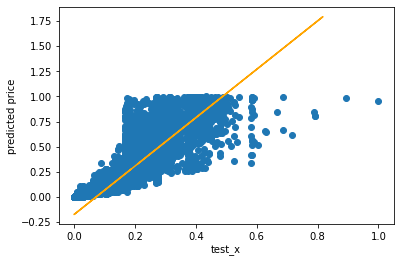

In [76]:
plt.scatter(X_u,Y_u)                                        # plotting the curve for univariate gradient descent
plt.plot(t_xtu,Yfinal_gr,color='orange')
plt.xlabel("test_x")
plt.ylabel("predicted price")

# **Multivariate Linear Regression**

**Closed form**

In [17]:
df=pd.read_csv("Diamonds.csv")                         # reading the above save preprocessed data
df=df.drop(['Unnamed: 0'],axis=1)                      # droppint the unnamed column
df.head(3)

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.000000,2,1,3
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.000000,3,1,2
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.000054,1,1,4


In [18]:
df.cov()         #checking for dependence among the columns

,carat,depth,table,x,y,z,price,cut,color,clarity
carat,0.009712,0.000111,0.000769,0.010037,0.001819,0.002085,0.019588,0.001734,0.048856,-0.036419
depth,0.000111,0.001584,-0.000506,-0.000105,-0.000023,0.000084,-0.000091,-0.007944,0.003201,-0.003643
table,0.000769,-0.000506,0.001847,0.000877,0.000153,0.000144,0.001178,0.006639,0.001935,-0.006538
x,0.010037,-0.000105,0.000877,0.010909,0.001974,0.002250,0.019924,0.002398,0.048023,-0.040659
y,0.001819,-0.000023,0.000153,0.001974,0.000376,0.000410,0.003619,0.000549,0.008695,-0.007277
z,0.002085,0.000084,0.000144,0.002250,0.000410,0.000492,0.004122,0.000046,0.010126,-0.008583
price,0.019588,-0.000091,0.001178,0.019924,0.003619,0.004122,0.046518,0.008835,0.063293,-0.026608
cut,0.001734,-0.007944,0.006639,0.002398,0.000549,0.000046,0.008835,1.056183,0.000532,0.050044
color,0.048856,0.003201,0.001935,0.048023,0.008695,0.010126,0.063293,0.000532,2.893757,-0.081544
clarity,-0.036419,-0.003643,-0.006538,-0.040659,-0.007277,-0.008583,-0.026608,0.050044,-0.081544,2.974214


In [19]:
df=df.reindex(columns=[col for col in df.columns if col!='price']+['price'])          # moving the dependent column price to the end
print(df.shape)
df.head(3)

(53940, 10)


,carat,depth,table,x,y,z,cut,color,clarity,price
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,2,1,3,0.000000
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,3,1,2,0.000000
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,1,1,4,0.000054


In [20]:
df=df.sample(frac=1)                                 # shuffling the dataset

In [21]:
XM=np.array(data.drop(['price'],1))                 #storing the values of input features in a variable XM
XM.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(53940, 9)

In [22]:
YM=np.array(data['price'])                        # storing the output values in variable YM
YM.shape

(53940,)

In [23]:
M_train=math.floor(0.8*XM.shape[0])   #spliting the data for training(80%) and testing(20%)
M_test=math.ceil(0.2*XM.shape[0])

train_xm=XM[:M_train]
train_ym=YM[:M_train]
test_xm=XM[M_train:]
test_ym=YM[M_train:]
print(train_xm.shape)
print(test_xm.shape)
print(train_ym.shape)
print(test_ym.shape)

(43152, 9)
(10788, 9)
(43152,)
(10788,)


In [24]:
X_m= pd.DataFrame(train_xm)               # storing the value for the training data into another variable
Y_m= pd.DataFrame(train_ym)

Xt_m= pd.DataFrame(test_xm)
Yt_m= pd.DataFrame(test_ym)
print(X_m.shape)
print(Y_m.shape)
print(Xt_m.shape)
print(Yt_m.shape)

(43152, 9)
(43152, 1)
(10788, 9)
(10788, 1)


In [25]:
Xp_m=np.append(X_m,np.ones((X_m.shape[0],1)),axis=1)                # appending 1 column to the feature training and testing data
print(Xp_m.shape)                                                   
Xtp_m=np.append(Xt_m,np.ones((Xt_m.shape[0],1)),axis=1)
print(Xtp_m.shape)


(43152, 10)
(10788, 10)


In [26]:
W_m=np.dot(np.linalg.inv(np.dot(Xp_m.T,Xp_m)),np.dot(Xp_m.T,Y_m))   #calculation of parameter vector using normal equation 
W_m                           # printing the parameter vector

array([[ 2.71478736],
       [-0.31303385],
       [-0.29949162],
       [-0.55910406],
       [ 0.18344711],
       [ 0.03637396],
       [ 0.00437525],
       [-0.01601578],
       [ 0.01740105],
       [ 0.34820713]])

In [27]:
# print(Xt_m.shape)
# print(W_m.shape)
ypred_m=np.dot(Xtp_m,W_m)      #calculation of predicted value
ypred_m                        # printing the predicted values

array([[0.06685354],
       [0.06378915],
       [0.06571948],
       ...,
       [0.13974715],
       [0.18225302],
       [0.20246584]])

In [28]:
loss_m=(np.dot(np.subtract(ypred_m,Yt_m).T,np.subtract(ypred_m,Yt_m)))/Yt_m.shape[0]         #calculating mean squared error
loss_m                                               # printing the error value

array([[0.0017809]])

# **Multivariate Linear Regression**

Gradient Descent

In [29]:
import math                            # making a function for computing the cost
def cost_function(X, y, theta):
    m_e = y.size
    ypred_mm=np.dot(X,theta)
    err=ypred_mm-y
    cost = 1/(2*m_e) * np.sum(np.square(err))
    return cost,err


In [30]:
def gradient_descent(X, y, theta, alpha, iters):  # function for computing the gradient descent 
    cost_array = np.zeros(iters)
    m_g = y.size
    for i in range(iters):
        cost,err= cost_function(X, y, theta)
        theta = theta - (alpha * ((1/m_g) * np.dot(X.T,err)))
        cost_array[i] = cost
    return theta, cost_array

In [43]:
                           # computation of loss for multivariate linear regression using gradient descent
alpha_gr=0.002            # learning rate                 
iters=1000

m=Y_m.size                
n=X_m.shape[1]
print(m)
print(X_m.shape)
print(Y_m.shape)
#Y_mgr=Y_m.reshape((m,1))
theta=np.zeros((n,1))

W_mgr,Cst=gradient_descent(X_m,Y_m,theta, alpha_gr,iters)

43152
(43152, 9)
(43152, 1)


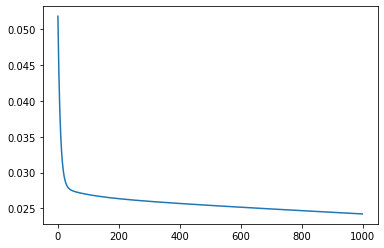

In [44]:
rng=np.arange(iters)          # plotting the curve between cost and iterations
plt.plot(rng,Cst)

In [45]:
ypred_mt=np.dot(Xt_m,theta)                       # computation of predicted value from the trained model
error=(1/Xt_m.shape[0])*np.sum(np.square(ypred_mt-Yt_m))   # finding the mean squared error
error                                                     # printing the error value

0    0.008073
dtype: float64